In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

import numpy as np
import tensorflow_datasets as tfds
import random

In [2]:
print(tf.__version__)
print(keras.__version__)
print(np.__version__)
print(tfds.__version__)

2.6.0
2.6.0
1.21.4
4.4.0


In [3]:
#Tensorflow가 활용할 GPU가 장착되어 있는지 확인
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import os
# 1. OS 및 Python 기본 random seed 설정
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)

# 2. NumPy의 random seed 설정
np.random.seed(SEED)

# 3. TensorFlow의 random seed 설정
tf.random.set_seed(SEED)

# # 4. TensorFlow 연산을 결정적으로 수행(set as false)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'
# os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

# 

In [7]:
import urllib3
urllib3.disable_warnings()

#tfds.disable_progress_bar()   # 이 주석을 풀면 데이터셋 다운로드과정의 프로그레스바가 나타나지 않습니다.

#tfds.load()는 기본적으로 ~/tensorflow_datasets 경로에 데이터셋을 다운로드합니다.
#data_dir 인자로 다른 폴더로 바꿀 수 있습니다.
import os
from pathlib import Path

(ds_train, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
    data_dir=Path.home()/'tensorflow_datasets'
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling cifar10-train.tfrecord...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling cifar10-test.tfrecord...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /aiffel/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [8]:
# 데이터셋이 준비되면 클래스의 수와 클래스에 따른 이름을 볼 수 있습니다.
# Tensorflow의 데이터셋은 Numpy가 아니므로 ds_train.shape 같은 게 존재하지 않습니다.
# Tensorflow 데이터셋을 로드하면 꼭 feature 정보를 확인해 보세요. 
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=tf.string),
    'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

<class 'tensorflow_datasets.core.features.class_label_feature.ClassLabel'>
<class 'tensorflow_datasets.core.features.image_feature.Image'>
<class 'tensorflow_datasets.core.features.text_feature.Text'>
['_shape', '_dtype', '_encoding', '_encoded_to_bytes', '_dynamic_shape', '_num_classes', '_str2int', '_int2str', '__module__', '__doc__', '__init__', 'num_classes', 'names', 'str2int', 'int2str', 'encode_example', 'save_metadata', 'load_metadata', '_additional_repr_info', 'repr_html', 'from_json_content', 'to_json_content', '__abstractmethods__', '_abc_impl', 'ALIASES', 'get_tensor_info', 'get_serialized_info', 'decode_example', 'decode_batch_example', 'decode_ragged_example', '__annotations__', '_registered_features', '__init_subclass__', 'shape', 'dtype', 'from_json', 'to_json', 'save_config', 'from_config', 'repr_html_batch', 'repr_html_ragged', '_flatten', '_nest', '__repr__', '__dict__', '__weakref__', '__hash__', '__str__', '__getattribute__', '__setattr__', '__delattr__', '__lt__',

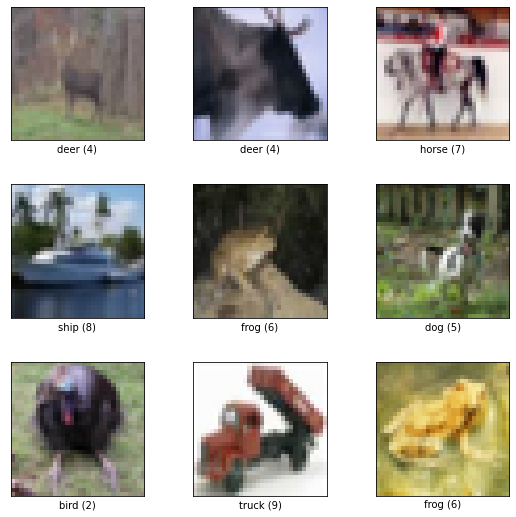

In [9]:
print(type(ds_info.features["label"]))
print(type(ds_info.features["image"]))
print(type(ds_info.features["id"]))

print(ds_info.features["label"].__dir__())

print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)
fig = tfds.show_examples(ds_train, ds_info)

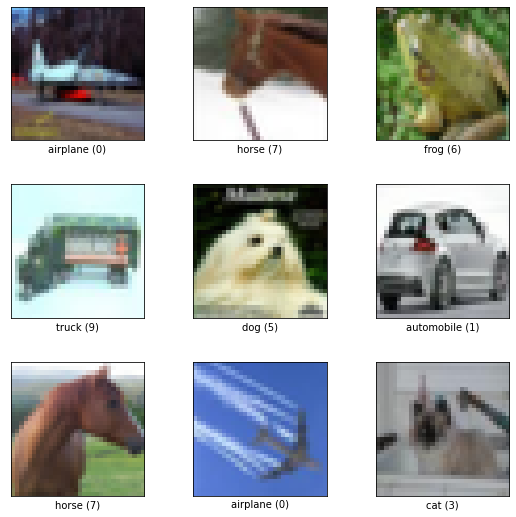

In [10]:
fig = tfds.show_examples(ds_test, ds_info)

In [11]:
# DatasetBuilder의 info를 통해 정보를 확인해 보세요.
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='/aiffel/tensorflow_datasets/cifar10/3.0.2',
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple la

In [12]:
# 데이터의 개수도 확인해 봅시다. 
print(type(ds_train))
print(type(ds_test))

print(tf.data.experimental.cardinality(ds_train))
print(tf.data.experimental.cardinality(ds_test))

<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
<class 'tensorflow.python.data.ops.dataset_ops._OptionsDataset'>
tf.Tensor(50000, shape=(), dtype=int64)
tf.Tensor(10000, shape=(), dtype=int64)


In [13]:
print(ds_train)
print(ds_test)

<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>


In [14]:
ds_info.__dir__()

['_builder',
 '_info_proto',
 '_features',
 '_splits',
 '_metadata',
 '_fully_initialized',
 '__module__',
 '__doc__',
 '__init__',
 'as_proto',
 'name',
 'full_name',
 'description',
 'version',
 'disable_shuffling',
 'homepage',
 'citation',
 'data_dir',
 'dataset_size',
 'download_size',
 'features',
 'metadata',
 'supervised_keys',
 'redistribution_info',
 'module_name',
 'file_format',
 'set_file_format',
 'splits',
 'set_splits',
 'initialized',
 '_dataset_info_path',
 '_license_path',
 'as_json',
 'write_to_directory',
 'read_from_directory',
 'initialize_from_bucket',
 '__repr__',
 '__dict__',
 '__weakref__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__new__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

In [15]:
# 데이터 전처리
# 정규화
def normalize_and_resize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    #image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.
    return image, label

def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(buffer_size=200, seed=SEED)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

In [16]:
# 1) VGG 모델 구현
# function for building VGG Block

def build_vgg_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                   ):
    # 입력 레이어
    x = input_layer

    # CNN 레이어
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            # kernel_initializer='he_normal',
            kernel_initializer=tf.keras.initializers.HeNormal(seed=SEED),  # Seed 적용
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)    

    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling'
    )(x)

    return x

vgg_input_layer = keras.layers.Input(shape=(32,32,3))   # 입력 레이어 생성
vgg_block_output = build_vgg_block(vgg_input_layer, block_num=1)    # VGG 블록 생성

# 블록 1개짜리 model 생성
model = keras.Model(inputs=vgg_input_layer, outputs=vgg_block_output)  

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 16, 16, 64)        0         
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


In [17]:
# VGG 모델 자체를 생성하는 함수입니다.
def build_vgg(input_shape=(32,32,3),
              num_cnn_list=[2,2,3,3,3],
              channel_list=[64,128,256,512,512],
              num_classes=10):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_vgg_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model

# 기본값을 그대로 사용해서 VGG 모델을 만들면 VGG-16이 됩니다.
vgg_16 = build_vgg()

vgg_16.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

In [18]:
# 원하는 블록의 설계에 따라 매개변수로 리스트를 전달해 줍니다.
vgg_19 = build_vgg(
    num_cnn_list=[2,2,4,4,4],
    channel_list=[64,128,256,512,512]
)

vgg_19.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

In [19]:
# Q. VGG-16보다 작은 네트워크인 VGG-13을 만들어 보세요.
vgg_13 = build_vgg(
    num_cnn_list=[2,2,2,2,2],
    channel_list=[64,128,256,512,512]
)
vgg_13.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block0_conv0 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block0_conv1 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block0_pooling (MaxPooling2D (None, 16, 16, 64)        0         
_________________________________________________________________
block1_conv0 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block1_pooling (MaxPooling2D (None, 8, 8, 128)         0   

In [20]:
BATCH_SIZE = 256
EPOCH = 15

ds_train = apply_normalize_on_dataset(ds_train, batch_size=BATCH_SIZE)
ds_test = apply_normalize_on_dataset(ds_test, batch_size=BATCH_SIZE)

In [21]:
import gc

# 1. **모든 모델 변수 삭제**
#모든 변수 삭제 (재시작 없이 완전 초기화) 
# 선언된 변수들을 del로 삭제하고 다시 gc.collect() 실행하면, Python에서 해당 변수들이 메모리에서 제거.
try:
    del model
    del vgg_input_layer
    del vgg_block_output
except NameError:
    pass  # 변수가 없으면 그냥 넘어감

# 현재 세션에서 생성된 모든 모델 삭제
keras.backend.clear_session()

#GPU 캐시 메모리 해제 (CUDA 사용 시)
#TensorFlow가 GPU를 사용할 경우, 할당된 메모리를 초기화해야 합니다.
# GPU 캐시 메모리 초기화
tf.config.experimental.reset_memory_stats('/GPU:0')

# 가비지 컬렉션 실행하여 메모리 해제
gc.collect()

17861

In [22]:
vgg_16.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_16 = vgg_16.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
195/195 [==============================] - 37s 136ms/step - loss: 2.2142 - accuracy: 0.1850 - val_loss: 2.1099 - val_accuracy: 0.2103
Epoch 2/15
195/195 [==============================] - 21s 108ms/step - loss: 1.9982 - accuracy: 0.2831 - val_loss: 1.9199 - val_accuracy: 0.3172
Epoch 3/15
195/195 [==============================] - 21s 107ms/step - loss: 1.8460 - accuracy: 0.3379 - val_loss: 1.7929 - val_accuracy: 0.3553
Epoch 4/15
195/195 [==============================] - 21s 110ms/step - loss: 1.7340 - accuracy: 0.3758 - val_loss: 1.6719 - val_accuracy: 0.4015
Epoch 5/15
195/195 [==============================] - 22s 111ms/step - loss: 1.6581 - accuracy: 0.4021 - val_loss: 1.5835 - val_accuracy: 0.4286
Epoch 6/15
195/195 [==============================] - 21s 109ms/step - loss: 1.5996 - accuracy: 0.4239 - val_loss: 1.5658 - val_accuracy: 0.4399
Epoch 7/15
195/195 [==============================] - 21s 110ms/step - loss: 1.5408 - accuracy: 0.4478 - val_loss: 1.5520 - val_ac

In [23]:
vgg_19.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, clipnorm=1.),
    metrics=['accuracy'],
)

history_19 = vgg_19.fit(
    ds_train,
    steps_per_epoch=int(ds_info.splits['train'].num_examples/BATCH_SIZE),
    validation_steps=int(ds_info.splits['test'].num_examples/BATCH_SIZE),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/15
195/195 [==============================] - 28s 127ms/step - loss: 2.2679 - accuracy: 0.1526 - val_loss: 2.1606 - val_accuracy: 0.2111
Epoch 2/15
195/195 [==============================] - 25s 127ms/step - loss: 2.0854 - accuracy: 0.2355 - val_loss: 2.0040 - val_accuracy: 0.2732
Epoch 3/15
195/195 [==============================] - 25s 130ms/step - loss: 1.9204 - accuracy: 0.3026 - val_loss: 1.8522 - val_accuracy: 0.3384
Epoch 4/15
195/195 [==============================] - 25s 129ms/step - loss: 1.7877 - accuracy: 0.3526 - val_loss: 1.7548 - val_accuracy: 0.3703
Epoch 5/15
195/195 [==============================] - 25s 129ms/step - loss: 1.6932 - accuracy: 0.3872 - val_loss: 1.6734 - val_accuracy: 0.3968
Epoch 6/15
195/195 [==============================] - 25s 130ms/step - loss: 1.6256 - accuracy: 0.4108 - val_loss: 1.5767 - val_accuracy: 0.4270
Epoch 7/15
195/195 [==============================] - 25s 130ms/step - loss: 1.5716 - accuracy: 0.4302 - val_loss: 1.5563 - val_ac

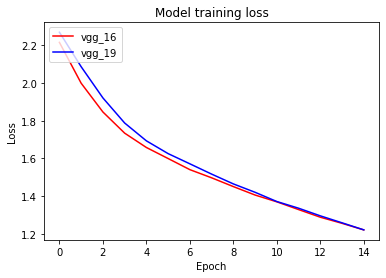

In [24]:
# 결과 출력
# 훈련 손실
plt.plot(history_16.history['loss'], 'r')
plt.plot(history_19.history['loss'], 'b')
plt.title('Model training loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()

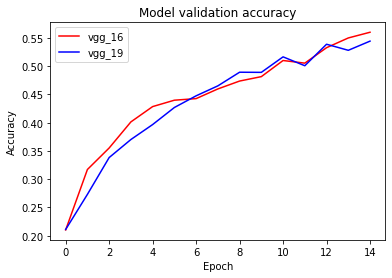

In [25]:
# 검증 손실
plt.plot(history_16.history['val_accuracy'], 'r')
plt.plot(history_19.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['vgg_16', 'vgg_19'], loc='upper left')
plt.show()